# **Loading the Dataset**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = '/content/content/ArASL_Database'

datagen = ImageDataGenerator(rescale=1./255)

data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical'
)
folder_classes = data_generator.class_indices
print("Class Labels:", folder_classes)

Found 43421 images belonging to 32 classes.
Class Labels: {'ain': 0, 'al': 1, 'aleff': 2, 'bb': 3, 'dal': 4, 'dha': 5, 'dhad': 6, 'fa': 7, 'gaaf': 8, 'ghain': 9, 'ha': 10, 'haa': 11, 'jeem': 12, 'kaaf': 13, 'khaa': 14, 'la': 15, 'laam': 16, 'meem': 17, 'nun': 18, 'ra': 19, 'saad': 20, 'seen': 21, 'sheen': 22, 'ta': 23, 'taa': 24, 'thaa': 25, 'thal': 26, 'toot': 27, 'waw': 28, 'ya': 29, 'yaa': 30, 'zay': 31}


# **Data Augmentation and Split Data into Training, Validation, and Testing**

**creating a dataset for the Test**

In [ ]:
#creating a dataset for the Test
import os
import shutil
import random

original_data_dir = '/content/content/ArASL_Database'
test_data_dir = '/content/content/Test_Database'

test_percentage = 0.2
os.makedirs(test_data_dir, exist_ok=True)
image_counts = {}

for class_name in os.listdir(original_data_dir):
    class_dir = os.path.join(original_data_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    test_class_dir = os.path.join(test_data_dir, class_name)
    os.makedirs(test_class_dir, exist_ok=True)

    files = os.listdir(class_dir)
    num_test_files = int(len(files) * test_percentage)

    test_files = random.sample(files, num_test_files)

    for file in test_files:
        shutil.move(os.path.join(class_dir, file), os.path.join(test_class_dir, file))

print("Test dataset created successfully!")


Test dataset created successfully!


In [ ]:
#show the number of images in the training dataset
import os
dataset_dir = '/content/content/ArASL_Database'
image_counts = {}

for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if not os.path.isdir(class_dir):
        continue
    files = os.listdir(class_dir)
    num_images = len(files)
    image_counts[class_name] = num_images

print("Number of images in each folder:")
for class_name, count in image_counts.items():
    print(f"Class '{class_name}': {count} images")


Number of images in each folder:
Class 'nun': 1165 images
Class 'al': 860 images
Class 'saad': 1213 images
Class 'gaaf': 1096 images
Class 'waw': 878 images
Class 'ghain': 1336 images
Class 'ya': 1103 images
Class 'haa': 977 images
Class 'ha': 1020 images
Class 'thaa': 1131 images
Class 'toot': 1147 images
Class 'thal': 1013 images
Class 'dhad': 1076 images
Class 'taa': 1177 images
Class 'aleff': 1071 images
Class 'ain': 1360 images
Class 'jeem': 1007 images
Class 'dha': 1116 images
Class 'la': 1124 images
Class 'khaa': 1029 images
Class 'ra': 1063 images
Class 'bb': 1160 images
Class 'sheen': 965 images
Class 'ta': 1163 images
Class 'dal': 1047 images
Class 'zay': 880 images
Class 'yaa': 828 images
Class 'seen': 1049 images
Class 'fa': 1254 images
Class 'laam': 1173 images
Class 'meem': 1130 images
Class 'kaaf': 1136 images


In [ ]:
#show the number of images in the test dataset
import os
dataset_dir = '/content/content/Test_Database'
image_counts = {}

for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    files = os.listdir(class_dir)
    num_images = len(files)
    image_counts[class_name] = num_images

print("Number of images in each folder:")
for class_name, count in image_counts.items():
    print(f"Class '{class_name}': {count} images")


Number of images in each folder:
Class 'nun': 654 images
Class 'al': 483 images
Class 'saad': 682 images
Class 'gaaf': 616 images
Class 'waw': 493 images
Class 'ghain': 741 images
Class 'ya': 619 images
Class 'haa': 549 images
Class 'ha': 572 images
Class 'thaa': 635 images
Class 'toot': 644 images
Class 'thal': 569 images
Class 'dhad': 604 images
Class 'taa': 661 images
Class 'aleff': 601 images
Class 'ain': 763 images
Class 'jeem': 563 images
Class 'dha': 626 images
Class 'la': 632 images
Class 'khaa': 578 images
Class 'ra': 596 images
Class 'bb': 650 images
Class 'sheen': 542 images
Class 'ta': 653 images
Class 'dal': 587 images
Class 'zay': 494 images
Class 'yaa': 465 images
Class 'seen': 589 images
Class 'fa': 704 images
Class 'laam': 659 images
Class 'meem': 635 images
Class 'kaaf': 638 images


**Data Augmentation and Split Data into Training, Validation, and Testing**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = '/content/content/ArASL_Database'
test_dir = '/content/content/Test_Database'

#Data augmentation for training ( if it's necessary)
#train_datagen = ImageDataGenerator(
 #   rescale=1.0/255,
  #  rotation_range=10,
   # width_shift_range=0.1,
    #height_shift_range=0.1,
    #shear_range=0.1,
    #zoom_range=0.1,
    #horizontal_flip=True,
    #fill_mode='nearest',
    #validation_split=0.1
#)

# Training data generator
train_datagen = ImageDataGenerator(rescale=1.0/255,validation_split=0.1)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 39093 images belonging to 32 classes.
Found 4328 images belonging to 32 classes.
Found 10838 images belonging to 32 classes.


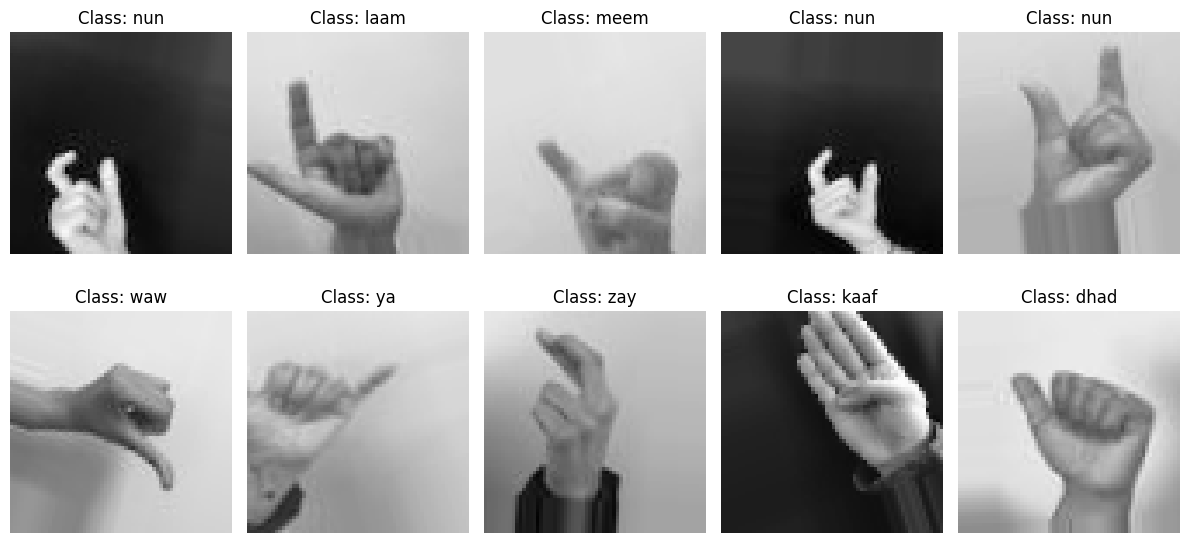

In [ ]:
#visualize some of images after augmentation
import matplotlib.pyplot as plt
images, labels = next(train_generator)

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {list(train_generator.class_indices.keys())[labels[i].argmax()]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# **Build the CNN Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
#design the model
model = Sequential([
    Conv2D(64, (3, 3),padding='same', activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),


    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),


    Conv2D(128, (3, 3),padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,276,064 (4.87 MB)

 Trainable params: 1,276,064 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define the checkpoint callback before training

from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Projects/ArSLR/checkpoint/best_model.keras',
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

**Balancing classes**

In [ ]:
#Balancing classes (when we need it )
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

class_indices = train_generator.classes
class_labels = np.unique(class_indices)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_labels),
    y=class_indices
)

class_weights_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weights_dict)


Class Weights: {0: 0.798468137254902, 1: 1.2620415805785123, 2: 1.0138226141078839, 3: 0.9361350574712644, 4: 1.0370596349745331, 5: 0.97265625, 6: 1.0096332644628099, 7: 0.8658088235294118, 8: 0.9907998783454988, 9: 0.812811876247505, 10: 1.0650882737576286, 11: 1.1116071428571428, 12: 1.0782491173874669, 13: 0.955912558685446, 14: 1.0549708549222798, 15: 0.9657361660079051, 16: 0.9254971590909091, 17: 0.9611772226593234, 18: 0.9318506864988558, 19: 1.0214517140468227, 20: 0.8949862637362638, 21: 1.035301906779661, 22: 1.1249136740331491, 23: 0.9339879587155964, 24: 0.9227010951661632, 25: 0.9604215801886793, 26: 1.0716282894736842, 27: 0.9470203488372093, 28: 1.2364941801619433, 29: 0.9844127719580983, 30: 1.3107899678111588, 31: 1.233996212121212}


In [ ]:
#train the model
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    steps_per_epoch=64,
    validation_steps=64,
    class_weight=class_weights_dict,
    callbacks=[checkpoint]
)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 825ms/step - accuracy: 0.0368 - loss: 3.4744
Epoch 1: val_loss improved from inf to 3.46470, saving model to /content/drive/MyDrive/Projects/ArSLR/checkpoint/best_model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.0368 - loss: 3.4743 - val_accuracy: 0.0225 - val_loss: 3.4647
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 741ms/step - accuracy: 0.0595 - loss: 3.4305
Epoch 2: val_loss improved from 3.46470 to 3.12280, saving model to /content/drive/MyDrive/Projects/ArSLR/checkpoint/best_model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 59s 930ms/step - accuracy: 0.0598 - loss: 3.4290 - val_accuracy: 0.1714 - val_loss: 3.1228
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 765ms/step - accuracy: 0.2327 - loss: 2.7780

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 3: val_loss improved from 3.12280 to 2.26407, saving model to /content/drive/MyDrive/Projects/ArSLR/checkpoint/best_model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.2332 - loss: 2.7745 - val_accuracy: 0.3491 - val_loss: 2.2641
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 745ms/step - accuracy: 0.4109 - loss: 2.0099
Epoch 4: val_loss improved from 2.26407 to 1.78964, saving model to /content/drive/MyDrive/Projects/ArSLR/checkpoint/best_model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 62s 972ms/step - accuracy: 0.4115 - loss: 2.0075 - val_accuracy: 0.4033 - val_loss: 1.7896
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 764ms/step - accuracy: 0.5432 - loss: 1.4492
Epoch 5: val_loss improved from 1.78964 to 1.57295, saving model to /content/drive/MyDrive/Projects/ArSLR/checkpoint/best_model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 63s 991ms/step - accuracy: 0.5433 - loss: 1.4489 - val_accuracy: 0.5010 - val_loss: 1.5730
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 752ms/step - accuracy: 0.6545 

In [ ]:
# Evaluate the model (on validation data)
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy* 100:.2f}%")



136/136 ━━━━━━━━━━━━━━━━━━━━ 30s 220ms/step - accuracy: 0.8024 - loss: 0.8183
Validation Loss: 0.8589667081832886
Validation Accuracy: 79.69%


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


339/339 ━━━━━━━━━━━━━━━━━━━━ 74s 219ms/step - accuracy: 0.9406 - loss: 0.2830
Test Accuracy: 94.56%


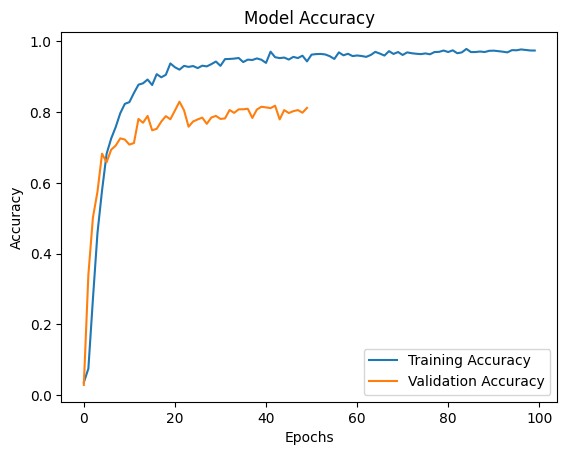

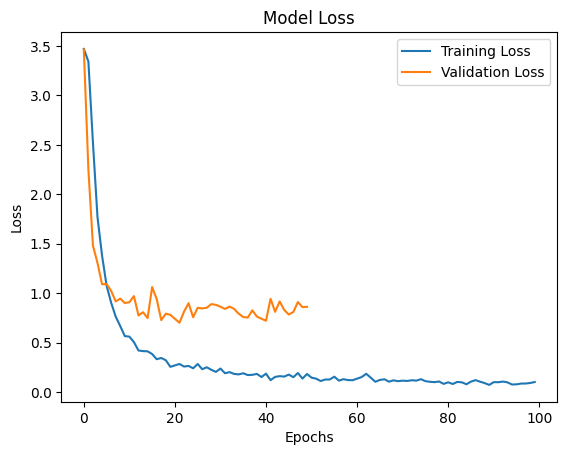

In [ ]:
#visualize Training Results
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=1)

print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))


339/339 ━━━━━━━━━━━━━━━━━━━━ 70s 208ms/step
              precision    recall  f1-score   support

         ain       0.98      0.94      0.96       424
          al       0.97      0.98      0.97       268
       aleff       0.95      0.95      0.95       334
          bb       0.95      0.95      0.95       362
         dal       0.91      0.96      0.94       326
         dha       0.96      0.91      0.93       348
        dhad       0.95      0.98      0.96       336
          fa       0.93      0.90      0.92       391
        gaaf       0.88      0.92      0.90       342
       ghain       0.98      0.94      0.96       417
          ha       0.92      0.91      0.92       318
         haa       0.87      0.95      0.91       305
        jeem       0.96      0.92      0.94       314
        kaaf       0.86      0.97      0.91       354
        khaa       0.99      0.82      0.90       321
          la       0.99      0.95      0.97       351
        laam       0.95      0.98    

In [ ]:
# Save the model
model.save('/content/content/MODEL/ar_sign_language_model.keras')
